In [1]:
import numpy as np
import pdb
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pylab as plt
from scipy import special

from context import aep, compute_psi_weave, compute_kernel, compute_psi_weave_new
from datautils import step, spiral
from context import config

In [2]:
import sys
sys.path.append('../geepee')
from kernels import compute_psi_weave_new

In [3]:
import os
data_path = '/tmp'
train_file, test_file = [os.path.join(data_path,
                                      'rectangles_im_' + ds + '.amat') 
                         for ds in ['train','test']]

In [4]:
def load_data(filename):
    file = open(filename,'rt')
    x = np.array([line.split()[:-1] for line in file.readlines()], np.float64)
    file = open(filename,'rt')
    y = np.array([0 if line.split()[-1]=='0.0000000e+00' else 1 for line in file.readlines()], np.int32)
    return x,y

x_train, y_train = load_data(train_file)
x_test, y_test = load_data(test_file)
y_train = np.reshape(y_train,(-1,1))
y_test = np.reshape(y_test,(-1,1))
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

((12000, 784), (50000, 784))
((12000, 1), (50000, 1))


In [5]:
y_train[np.where(y_train == 0)[0]] = -1

In [6]:
M = 100 #number of inducing points
hidden_size = [30] #dimensions of hidden layers
dgp1_origin = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
dgp1_origin.optimise(method='adam', alpha=1.0, maxiter=2000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.8010665
iter 10 	 obj 0.7832681
iter 20 	 obj 0.7700415
iter 30 	 obj 0.7577174
iter 40 	 obj 0.7458912
iter 50 	 obj 0.7208346
iter 60 	 obj 0.6799655
iter 70 	 obj 0.6764031
iter 80 	 obj 0.6327995
iter 90 	 obj 0.6085223
iter 100 	 obj 0.6043835
iter 110 	 obj 0.6028215
iter 120 	 obj 0.5890251
iter 130 	 obj 0.5840976
iter 140 	 obj 0.5783366
iter 150 	 obj 0.5862694
iter 160 	 obj 0.5734437
iter 170 	 obj 0.5654647
iter 180 	 obj 0.5679348
iter 190 	 obj 0.5716296
iter 200 	 obj 0.5704922
iter 210 	 obj 0.5387300
iter 220 	 obj 0.5330992
iter 230 	 obj 0.5439565
iter 240 	 obj 0.5709120
iter 250 	 obj 0.5364751
iter 260 	 obj 0.5486721
iter 270 	 obj 0.5437761
iter 280 	 obj 0.5457497
iter 290 	 obj 0.5347830
iter 300 	 obj 0.5437686
iter 310 	 obj 0.5241049
iter 320 	 obj 0.5298297
iter 330 	 obj 0.5315084
iter 340 	 obj 0.5277607
iter 350 	 obj 0.5384010
iter 360 	 obj 0.5303081
iter 370 	 obj 0.5305630
iter 380 	 obj 0.5458242
iter 390 	 obj 0.4967248
iter 400 	 

{'eta1_R_0': array([[ 0.68969095,  0.02596229, -0.05990094, ...,  0.36158832,
         -0.08296142,  0.34827641],
        [ 0.78635789,  0.11595176,  0.26619248, ...,  0.96549342,
         -0.02355775,  0.4912759 ],
        [ 1.80844815,  0.33532924,  0.07151761, ...,  0.41351244,
         -0.09506181,  0.80594845],
        ...,
        [ 0.39944834,  0.28536482,  0.0197925 , ...,  1.11035654,
          0.07363549,  2.17623475],
        [ 0.76275507,  0.16688824,  0.18565217, ...,  0.43227889,
          0.00641675,  0.51308799],
        [ 0.78624867,  0.09900133,  0.11167005, ...,  1.2250862 ,
          0.05630435,  0.44730461]]),
 'eta1_R_1': array([[ 0.36954336,  0.03687257,  0.01992842, ...,  0.51516938,
         -0.04552417,  0.8490284 ]]),
 'eta2_0': array([[  -3.54732298,   -2.173521  ,   -4.74094069, ...,    5.194793  ,
            2.08541727,    2.61277541],
        [  -4.00010854,   -3.47334415,  -95.76730356, ...,    2.07095768,
            8.69907053,    3.50601704],
       

In [16]:
M = 100 #number of inducing points
hidden_size = [2,2] #dimensions of hidden layers
dgp2_origin = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
dgp2_origin.optimise(method='adam', alpha=1.0, maxiter=1000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.7090030
iter 10 	 obj 0.6993634
iter 20 	 obj 0.6923417
iter 30 	 obj 0.6805012
iter 40 	 obj 0.6537517
iter 50 	 obj 0.6298926
iter 60 	 obj 0.5888937
iter 70 	 obj 0.5610073
iter 80 	 obj 0.5456314
iter 90 	 obj 0.5494229
iter 100 	 obj 0.5353992
iter 110 	 obj 0.5230190
iter 120 	 obj 0.5107306
iter 130 	 obj 0.5187263
iter 140 	 obj 0.5251659
iter 150 	 obj 0.4950347
iter 160 	 obj 0.4999785
iter 170 	 obj 0.4817842
iter 180 	 obj 0.4604654
iter 190 	 obj 0.4841608
iter 200 	 obj 0.4888806
iter 210 	 obj 0.4934878
iter 220 	 obj 0.4763777
iter 230 	 obj 0.5072506
iter 240 	 obj 0.4842028
iter 250 	 obj 0.4713259
iter 260 	 obj 0.4589858
iter 270 	 obj 0.4890898
iter 280 	 obj 0.4757543
iter 290 	 obj 0.4681181
iter 300 	 obj 0.4619206
iter 310 	 obj 0.4663573
iter 320 	 obj 0.4885999
iter 330 	 obj 0.4686604
Caught KeyboardInterrupt ...


{'eta1_R_0': array([[ 0.60386343,  0.07360106,  0.08876986, ...,  0.67630547,
         -0.11180125,  1.00517322],
        [ 0.64994917,  0.12106673,  0.11610856, ...,  0.46345761,
          0.01991423,  0.77460593]]),
 'eta1_R_1': array([[ 0.43704498,  0.02709692,  0.02318399, ...,  0.4427747 ,
          0.01228127,  0.74705228],
        [ 1.08996081, -0.00413915, -0.00223025, ...,  0.4803515 ,
          0.05156248,  0.99686777]]),
 'eta1_R_2': array([[ 0.36328191,  0.01186094,  0.0081029 , ...,  0.71688807,
         -0.06924176,  0.37845885]]),
 'eta2_0': array([[-3.41165093e+00, -1.26828029e+01, -1.85236484e+00,
         -1.93217597e+00, -6.84543169e+00, -5.15284069e+00,
         -2.32126708e+00, -1.87643217e+01, -2.30429983e+00,
         -2.51500077e+00, -7.38350227e+00, -2.43269940e+00,
         -2.31134157e+00, -2.47194506e+00, -2.32063363e+00,
         -1.13648131e+02, -4.38486207e+00, -3.90114853e+00,
         -2.40567473e+00, -1.35127519e+01, -1.77987089e+01,
         -2.311018

In [12]:
M = 100 #number of inducing points
hidden_size = [3,3] #dimensions of hidden layers
dgp2_origin3 = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
dgp2_origin3.optimise(method='adam', alpha=1.0, maxiter=1000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.7075238
iter 10 	 obj 0.7043908
iter 20 	 obj 0.6993530
iter 30 	 obj 0.6896581
iter 40 	 obj 0.6621585
iter 50 	 obj 0.6369804
iter 60 	 obj 0.6152686
iter 70 	 obj 0.5673797
iter 80 	 obj 0.5557309
iter 90 	 obj 0.5232951
iter 100 	 obj 0.5098583
iter 110 	 obj 0.5234450
iter 120 	 obj 0.5262694
iter 130 	 obj 0.5204156
iter 140 	 obj 0.5131937
iter 150 	 obj 0.4942920
iter 160 	 obj 0.5168248
iter 170 	 obj 0.5264807
iter 180 	 obj 0.4760901
iter 190 	 obj 0.4719660
iter 200 	 obj 0.5128439
iter 210 	 obj 0.5073673
iter 220 	 obj 0.4727657
iter 230 	 obj 0.4998918
iter 240 	 obj 0.4821599
iter 250 	 obj 0.4891828
iter 260 	 obj 0.4558940
iter 270 	 obj 0.4645040
iter 280 	 obj 0.4821248
iter 290 	 obj 0.4607310
iter 300 	 obj 0.4688292
iter 310 	 obj 0.4738467
iter 320 	 obj 0.4712430
iter 330 	 obj 0.4669199
iter 340 	 obj 0.4906833
iter 350 	 obj 0.4567782
iter 360 	 obj 0.4727866
iter 370 	 obj 0.4443060
iter 380 	 obj 0.4657403
iter 390 	 obj 0.4663514
iter 400 	 

{'eta1_R_0': array([[ 4.44496926e-01,  2.12069918e-02,  5.78586757e-02, ...,
          1.21720724e+00,  1.30363734e-01,  4.32662596e-01],
        [ 6.01546760e-01,  1.35196202e-04,  1.44972783e-01, ...,
          4.04341358e-01,  1.09504073e-01,  4.55783993e-01],
        [ 6.30403522e-01, -3.56097239e-02,  1.05014425e-01, ...,
          1.38028811e+00,  1.43087591e-01,  5.05187768e-01]]),
 'eta1_R_1': array([[ 1.12243238e+00,  5.06278104e-02,  2.22333109e-02, ...,
          6.35747208e-01, -4.92568040e-03,  5.44250601e-01],
        [ 8.76161006e-01,  7.03176025e-02,  5.10591411e-02, ...,
          8.09187732e-01,  1.09477814e-03,  1.22743354e+00],
        [ 6.39318532e-01, -1.56164929e-03, -6.42115285e-02, ...,
          1.39672479e+00,  3.54156219e-02,  9.45986170e-01]]),
 'eta1_R_2': array([[ 0.42657418, -0.00590514, -0.00501252, ...,  0.958938  ,
          0.01328326,  0.72622894]]),
 'eta2_0': array([[-2.11059144e+00, -4.72849906e+00, -3.37943255e+00,
         -1.02485745e+01, -4.5

In [6]:
M = 100 #number of inducing points
hidden_size = [2,2,2] #dimensions of hidden layers
dgp2_origin3 = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
dgp2_origin3.optimise(method='adam', alpha=1.0, maxiter=1000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.7129871
iter 10 	 obj 0.6965715
iter 20 	 obj 0.6883645
iter 30 	 obj 0.6698255
iter 40 	 obj 0.6565244
iter 50 	 obj 0.6007198
iter 60 	 obj 0.5622358
iter 70 	 obj 0.5681261
iter 80 	 obj 0.5437166
iter 90 	 obj 0.5367755
iter 100 	 obj 0.5157441
iter 110 	 obj 0.5181210
iter 120 	 obj 0.5189297
iter 130 	 obj 0.5051675
iter 140 	 obj 0.4761833
iter 150 	 obj 0.4914119
iter 160 	 obj 0.4934584
iter 170 	 obj 0.4795200
iter 180 	 obj 0.4730626
iter 190 	 obj 0.4664101
iter 200 	 obj 0.4665112
iter 210 	 obj 0.4714508
iter 220 	 obj 0.4762190
iter 230 	 obj 0.4683390
iter 240 	 obj 0.4622238
iter 250 	 obj 0.4802864
iter 260 	 obj 0.4896056
iter 270 	 obj 0.4664869
iter 280 	 obj 0.4866935
iter 290 	 obj 0.4804216
iter 300 	 obj 0.4654803
iter 310 	 obj 0.5049794
iter 320 	 obj 0.4365696
iter 330 	 obj 0.4480522
iter 340 	 obj 0.4632664
iter 350 	 obj 0.4499848
iter 360 	 obj 0.4411023
iter 370 	 obj 0.4836614
iter 380 	 obj 0.4735153
iter 390 	 obj 0.4580031
iter 400 	 

{'eta1_R_0': array([[ 0.343308  , -0.04268853, -0.04044327, ...,  0.89388145,
         -0.09580791,  0.35179354],
        [ 1.10846507,  0.04352015, -0.06330527, ...,  0.75691482,
         -0.04562804,  1.26787279]]),
 'eta1_R_1': array([[ 1.16085412, -0.05164984, -0.0539279 , ...,  1.0137088 ,
          0.03080627,  0.77947511],
        [ 1.40398179, -0.04858105, -0.050375  , ...,  1.6997809 ,
          0.02813612,  1.4579908 ]]),
 'eta1_R_2': array([[ 0.6845286 ,  0.01301599,  0.01107388, ...,  0.65525099,
         -0.05307815,  0.49448712],
        [ 0.70557309, -0.06372366, -0.07875206, ...,  1.14876531,
          0.04874775,  1.74113202]]),
 'eta1_R_3': array([[ 0.65497405, -0.05532161, -0.05629633, ...,  0.67150497,
         -0.02899972,  1.26908869]]),
 'eta2_0': array([[-2.09245991e+00, -1.66704375e+01, -2.52436483e+00,
         -2.65966671e+01, -2.49299669e+00, -1.48558191e+01,
         -6.70091342e+00, -2.23331632e+00, -8.63108898e+00,
         -9.05858384e+00, -5.26900770e+0

In [23]:
M = 100 #number of inducing points
hidden_size = [3] #dimensions of hidden layers
dgp1 = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
dgp1.optimise(method='adam', alpha=1.0, maxiter=1000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.7159771
iter 10 	 obj 0.7125009
iter 20 	 obj 0.7038863
iter 30 	 obj 0.6996671
iter 40 	 obj 0.6924374
iter 50 	 obj 0.6924228
iter 60 	 obj 0.6887918
iter 70 	 obj 0.6748455
iter 80 	 obj 0.6772266
iter 90 	 obj 0.6829876
iter 100 	 obj 0.6579406
iter 110 	 obj 0.6666493
iter 120 	 obj 0.6418892
iter 130 	 obj 0.6519661
iter 140 	 obj 0.6398819
iter 150 	 obj 0.6440822
iter 160 	 obj 0.6325263
iter 170 	 obj 0.6332026
iter 180 	 obj 0.6042116
iter 190 	 obj 0.6212481
iter 200 	 obj 0.6184828
iter 210 	 obj 0.6220297
iter 220 	 obj 0.5976604
iter 230 	 obj 0.5887314
iter 240 	 obj 0.5796796
iter 250 	 obj 0.5674743
iter 260 	 obj 0.5922913
iter 270 	 obj 0.5566019
iter 280 	 obj 0.5617290
iter 290 	 obj 0.5483780
iter 300 	 obj 0.5653684
iter 310 	 obj 0.5420155
iter 320 	 obj 0.5194669
iter 330 	 obj 0.5211590
iter 340 	 obj 0.5568722
iter 350 	 obj 0.4916788
iter 360 	 obj 0.5204874
iter 370 	 obj 0.5088842
iter 380 	 obj 0.5171023
iter 390 	 obj 0.4971033
iter 400 	 

{'eta1_R_0': array([[ 0.85348352,  0.12644783,  0.08505204, ...,  0.38855231,
          0.01027276,  0.38400236],
        [ 0.30918611,  0.11135021,  0.04178369, ...,  1.18566188,
         -0.06383359,  0.17248563],
        [ 1.69094517,  0.09147113,  0.11131946, ...,  0.73168603,
          0.13218055,  0.28322115]]),
 'eta1_R_1': array([[ 1.35541541,  0.0331591 , -0.06704683, ...,  0.54276601,
          0.08569279,  1.08130089]]),
 'eta2_0': array([[-5.47943214e+00, -2.11378705e+00, -1.38329242e+01,
         -3.71792864e+00, -2.91885534e+00, -2.18156422e+00,
         -4.47600369e+00, -4.14205160e+00, -3.89071529e+00,
         -2.84551169e+00, -4.90415097e+00, -6.68627879e+01,
         -1.20376613e+01, -1.83449134e+00, -3.97240012e+00,
         -2.36112406e+00, -1.72503360e+00, -1.69253630e+00,
         -2.91721354e+00, -1.87613916e+00, -1.98268341e+00,
         -1.46537495e+00, -1.37196210e+00, -3.05292790e+00,
         -1.19202672e+00, -5.37879171e+00, -1.21444109e+00,
         -1.39

In [19]:
M = 100 #number of inducing points
hidden_size = [30,30] #dimensions of hidden layers
model = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
model.optimise(method='adam', alpha=1.0, maxiter=2000,
                mb_size=mb_size, adam_lr=0.001)

Caught KeyboardInterrupt ...


TypeError: object of type 'NoneType' has no len()

In [11]:
M = 100 #number of inducing points
hidden_size = [2] #dimensions of hidden layers
model = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
model.optimise(method='adam', alpha=1.0, maxiter=1000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.800
iter 10 	 obj 0.780
iter 20 	 obj 0.768
iter 30 	 obj 0.758
iter 40 	 obj 0.752
iter 50 	 obj 0.747
iter 60 	 obj 0.743
iter 70 	 obj 0.740
iter 80 	 obj 0.737
iter 90 	 obj 0.734
iter 100 	 obj 0.732
iter 110 	 obj 0.730
iter 120 	 obj 0.727
iter 130 	 obj 0.725
iter 140 	 obj 0.724
iter 150 	 obj 0.723
iter 160 	 obj 0.721
iter 170 	 obj 0.720
iter 180 	 obj 0.718
iter 190 	 obj 0.718
iter 200 	 obj 0.717
iter 210 	 obj 0.716
iter 220 	 obj 0.715
iter 230 	 obj 0.714
iter 240 	 obj 0.713
iter 250 	 obj 0.713
iter 260 	 obj 0.712
iter 270 	 obj 0.711
iter 280 	 obj 0.711
iter 290 	 obj 0.710
iter 300 	 obj 0.710
iter 310 	 obj 0.709
iter 320 	 obj 0.709
iter 330 	 obj 0.708
iter 340 	 obj 0.708
iter 350 	 obj 0.708
iter 360 	 obj 0.707
iter 370 	 obj 0.708
iter 380 	 obj 0.707
iter 390 	 obj 0.707
iter 400 	 obj 0.706
iter 410 	 obj 0.706
iter 420 	 obj 0.706
iter 430 	 obj 0.706
iter 440 	 obj 0.706
iter 450 	 obj 0.705
iter 460 	 obj 0.705
iter 470 	 obj 0.705
ite

{'eta1_R_0': array([[ 0.37361433,  0.1179114 ,  0.10014341, ...,  1.29247766,
         -0.17296027,  0.36651657],
        [ 0.83078001,  0.07215067,  0.14424959, ..., -0.00215177,
         -0.0835742 ,  0.53010826],
        [ 0.83794192,  0.11173276,  0.12341974, ...,  0.37567413,
         -0.34509981, -0.08802694],
        ...,
        [ 0.94318165,  0.11633798,  0.15207972, ...,  1.3307157 ,
         -0.17967604,  0.06748071],
        [ 0.91604148,  0.13693372,  0.18685947, ...,  0.20001934,
         -0.08259816,  0.27020732],
        [ 0.80536565,  0.09086398,  0.136032  , ...,  0.40844568,
          0.03713772,  1.29789558]]),
 'eta1_R_1': array([[0.68399287, 0.05036694, 0.27678576, ..., 0.21480037, 0.23305272,
         1.59595407]]),
 'eta2_0': array([[ -2.28179838,  -5.82894886,  -3.20251997, ...,  11.84613708,
          18.99539502,   3.81518319],
        [ -4.58349433,  -2.73851737,  -9.24501281, ...,  12.36021772,
           2.00069964,   4.14414263],
        [ -4.66022365,  -

In [6]:
M=100
hidden_size = [30,30] #dimensions of hidden layers
model2 = aep.SDGPR(x_train, y_train, M, hidden_size, lik='Probit')
mb_size = 1000 #mini-batch size
model2.optimise(method='adam', alpha=1.0, maxiter=5000,
                mb_size=mb_size, adam_lr=0.001)

iter 0 	 obj 0.895
iter 10 	 obj 0.861
iter 20 	 obj 0.839
iter 30 	 obj 0.825
iter 40 	 obj 0.815
iter 50 	 obj 0.804
iter 60 	 obj 0.797
iter 70 	 obj 0.791
iter 80 	 obj 0.786
iter 90 	 obj 0.781
iter 100 	 obj 0.776
iter 110 	 obj 0.772
iter 120 	 obj 0.769
iter 130 	 obj 0.765
iter 140 	 obj 0.762
iter 150 	 obj 0.760
iter 160 	 obj 0.757
iter 170 	 obj 0.754
iter 180 	 obj 0.752
iter 190 	 obj 0.750
iter 200 	 obj 0.748
iter 210 	 obj 0.746
iter 220 	 obj 0.744
iter 230 	 obj 0.743
iter 240 	 obj 0.741
iter 250 	 obj 0.740
iter 260 	 obj 0.740
iter 270 	 obj 0.737
iter 280 	 obj 0.736
iter 290 	 obj 0.735
iter 300 	 obj 0.734
iter 310 	 obj 0.733
iter 320 	 obj 0.732
iter 330 	 obj 0.731
iter 340 	 obj 0.730
iter 350 	 obj 0.730
iter 360 	 obj 0.729
iter 370 	 obj 0.729
iter 380 	 obj 0.727
iter 390 	 obj 0.727
iter 400 	 obj 0.726
iter 410 	 obj 0.726
iter 420 	 obj 0.725
iter 430 	 obj 0.725
iter 440 	 obj 0.723
iter 450 	 obj 0.724
iter 460 	 obj 0.723
iter 470 	 obj 0.722
ite

iter 3780 	 obj 0.700
iter 3790 	 obj 0.700
iter 3800 	 obj 0.700
iter 3810 	 obj 0.700
iter 3820 	 obj 0.699
iter 3830 	 obj 0.699
iter 3840 	 obj 0.699
iter 3850 	 obj 0.699
iter 3860 	 obj 0.699
iter 3870 	 obj 0.699
iter 3880 	 obj 0.699
iter 3890 	 obj 0.699
iter 3900 	 obj 0.699
iter 3910 	 obj 0.699
iter 3920 	 obj 0.699
iter 3930 	 obj 0.699
iter 3940 	 obj 0.699
iter 3950 	 obj 0.699
iter 3960 	 obj 0.699
iter 3970 	 obj 0.699
iter 3980 	 obj 0.699
iter 3990 	 obj 0.699
iter 4000 	 obj 0.699
iter 4010 	 obj 0.699
iter 4020 	 obj 0.699
iter 4030 	 obj 0.699
iter 4040 	 obj 0.699
iter 4050 	 obj 0.699
iter 4060 	 obj 0.699
iter 4070 	 obj 0.699
iter 4080 	 obj 0.699
iter 4090 	 obj 0.699
iter 4100 	 obj 0.699
iter 4110 	 obj 0.699
iter 4120 	 obj 0.699
iter 4130 	 obj 0.699
iter 4140 	 obj 0.699
iter 4150 	 obj 0.699
iter 4160 	 obj 0.699
iter 4170 	 obj 0.699
iter 4180 	 obj 0.699
iter 4190 	 obj 0.699
iter 4200 	 obj 0.699
iter 4210 	 obj 0.699
iter 4220 	 obj 0.699
iter 4230 

{'eta1_R_0': array([[ 1.95755464,  0.08603472,  0.12685344, ..., -0.12270506,
         -0.61884961, -0.26526524],
        [ 2.57492821,  0.12113935,  0.08396553, ...,  0.55180112,
         -1.02782794, -0.46609996],
        [ 0.89393065,  0.08151412,  0.05217465, ..., -0.224806  ,
         -0.52587129,  0.37227007],
        ...,
        [ 0.44810043,  0.21779831,  0.07496035, ...,  0.23034078,
         -0.54331032, -0.1155546 ],
        [ 0.45315631,  0.09626103,  0.08461934, ...,  0.23379636,
         -0.78740851, -0.05350609],
        [ 0.29635925,  0.08043467,  0.14025664, ...,  0.2166466 ,
         -0.21429861,  0.16712345]]),
 'eta1_R_1': array([[ 0.35733712,  0.50108865,  0.23142887, ..., -0.36432102,
         -0.50905072,  0.11943174],
        [ 1.6971353 ,  0.13821374,  0.10490307, ...,  0.03593278,
         -0.01510402, -0.17817977],
        [ 0.53224736,  0.31201617,  0.25238749, ...,  0.13315322,
         -0.31100144,  0.47344951],
        ...,
        [ 1.22457174,  0.29942

In [8]:
from scipy import special
def inv_probit(x):
    jitter = 1e-3  # ensures output is strictly between 0 and 1
    return 0.5 * (1.0 + special.erf(x / np.sqrt(2.0))) \
        * (1 - 2 * jitter) + jitter
def assess_model_dgp(model, X_batch, Y_batch):
    mf, vf = model.predict_f(X_batch)
    p = inv_probit(mf / np.sqrt(1 + vf))
    a = ((p>0.5).astype(int) == Y_batch.astype(int))
    l = np.log(np.where(np.equal(Y_batch, 1), p, 1 - p))
    return l,a

def predict_prob(model, X_batch, Y_batch):
    mf, vf = model.predict_f(X_batch)
    p = inv_probit(mf / np.sqrt(1 + vf))
    return p

In [9]:
def batch_assess(model, assess_model, X, Y):
    n_batches = max(int(len(X)/1000), 1)
    lik, acc = [], []
    for X_batch, Y_batch in zip(np.split(X, n_batches), np.split(Y, n_batches)):
        l, a = assess_model(model, X_batch, Y_batch)
        lik.append(l)
        acc.append(a)
    lik = np.concatenate(lik, 0)
    acc = np.array(np.concatenate(acc, 0), dtype=float)
    return np.average(lik), np.average(acc)

In [10]:
from sklearn.calibration import calibration_curve
def calibrate_curve(model, X, Y):
    n_batches = max(int(len(X)/1000), 1)
    pred_prob= []
    for X_batch, Y_batch in zip(np.split(X, n_batches), np.split(Y, n_batches)):
        prob = predict_prob(model, X_batch, Y_batch)
        pred_prob.append(prob)
        
    pred_prob = np.concatenate(pred_prob, 0)
    return pred_prob

pred_prob = calibrate_curve(dgp1_origin, x_test, y_test)

In [12]:
fraction_of_positives, mean_predicted_value = \
        calibration_curve(y_test, pred_prob, normalize=True, n_bins=15)

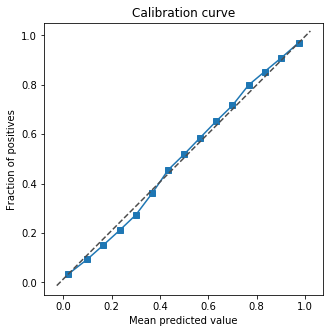

In [18]:
plt.figure(figsize=(5,5))
plt.plot(mean_predicted_value, fraction_of_positives,'s-',label="DGP2 AEP")
plt.plot(plt.xlim(), plt.ylim(), ls="--", c=".3")
plt.ylabel("Fraction of positives")
plt.ylim([-0.05, 1.05])
plt.title('Calibration curve')
plt.xlabel("Mean predicted value")
plt.show()

In [28]:
print(mean_predicted_value, fraction_of_positives)

(array([0.03516251, 0.14923584, 0.2513685 , 0.35331412, 0.45203478,
       0.54947086, 0.64809068, 0.74767426, 0.8497438 , 0.96396824]), array([0.05298399, 0.14217557, 0.23448276, 0.34014345, 0.4461263 ,
       0.5482866 , 0.65828612, 0.77365407, 0.86036671, 0.9580881 ]))


In [22]:
l,a = batch_assess(dgp1, assess_model_dgp, x_test, y_test)
print('aep dgp1 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep dgp1 test lik: -0.4923, test acc 0.7537


In [10]:
l,a = batch_assess(dgp1_origin, assess_model_dgp, x_test, y_test)
print('aep_hidden2 dgp1 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep_hidden2 dgp1 test lik: -0.4815, test acc 0.7519


In [31]:
l,a = batch_assess(model, assess_model_dgp, x_test, y_test)
print('aep2 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep2 test lik: -0.5035, test acc 0.7435


In [11]:
l,a = batch_assess(dgp2_origin, assess_model_dgp, x_test, y_test)
print('aep_hidden2 dgp2 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep_hidden2 dgp2 test lik: -0.4937, test acc 0.7519


In [13]:
l,a = batch_assess(dgp2_origin3, assess_model_dgp, x_test, y_test)
print('aep_hidden3 dgp2 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep_hidden3 dgp2 test lik: -0.4953, test acc 0.7503


In [10]:
l,a = batch_assess(dgp2_origin3, assess_model_dgp, x_test, y_test)
print('aep_hidden2 dgp3 test lik: {:.4f}, test acc {:.4f}'.format(l, a))

aep_hidden2 dgp3 test lik: -0.5107, test acc 0.7471


In [19]:
def forward_prop_thru_post(layer, mx, vx=None, final_layer=False):
    if vx is None:
        return _forward_prop_deterministic_thru_post(layer, mx)
    else:
        if final_layer == True:
            return _forward_prop_random_thru_post_mm(layer, mx, vx)
        else:
            return _forward_prop_random_thru_post_mm_linearMean(layer, mx, vx)
    
def _forward_prop_deterministic_thru_post(layer, x):
    psi0 = np.exp(2 * layer.sf)
    psi1 = compute_kernel(2 * layer.ls, 2 * layer.sf, x, layer.zu)
    mout = np.dot(x, layer.W) + np.einsum('nm,dm->nd', psi1, layer.A)
    Bpsi2 = np.einsum('dab,na,nb->nd', layer.B_det, psi1, psi1)
    vout = psi0 + Bpsi2
    return mout, vout

def _forward_prop_random_thru_post_mm_linearMean(layer, mx, vx):
    psi0 = np.exp(2.0 * layer.sf)
    psi1, psi2, check = compute_psi_weave_new(
        2 * layer.ls, 2 * layer.sf, mx, vx, layer.zu)
    psi3 = np.einsum('nmq,qd->dnm', check, layer.W) * psi1[None,:,:]
    psi4 = np.einsum('nq,qd->nd', vx+mx**2, layer.W**2)
    mout = np.einsum('nq,qd->nd', mx, layer.W) + np.einsum('nm,dm->nd', psi1, layer.A)
    Apsi3 = np.einsum('dm,dnm->nd', layer.A, psi3)
    Bpsi2 = np.einsum('dab,nab->nd', layer.B_sto, psi2)
    vout = psi0 + psi4 + 2*Apsi3 + Bpsi2 - mout**2
    return mout, vout
    
def _forward_prop_random_thru_post_mm(layer, mx, vx):
    psi0 = np.exp(2.0 * layer.sf)
    psi1, psi2 = compute_psi_weave(
        2 * layer.ls, 2 * layer.sf, mx, vx, layer.zu)
    mout = np.einsum('nm,dm->nd', psi1, layer.A)
    Bpsi2 = np.einsum('dab,nab->nd', layer.B_sto, psi2)
    vout = psi0 + Bpsi2 - mout**2
    return mout, vout

def update_posterior(layer):
    """update the posterior approximation
    """
    if layer.nat_param:
        layer.Suinv = layer.Kuuinv + layer.theta_1
        layer.Su = np.linalg.inv(layer.Suinv)
        # self.Su = matrixInverse(self.Suinv)
        layer.mu = np.einsum('dab,db->da', layer.Su, layer.theta_2)
    
    ZW = np.einsum('mq,qd->dm', layer.zu, layer.W)
    layer.Splusmm = layer.Su + np.einsum('da,db->dab', layer.mu, layer.mu)
    SplusmmB = layer.Su + np.einsum('da,db->dab', layer.mu-ZW, layer.mu-ZW)
    layer.A = np.einsum('ab,db->da', layer.Kuuinv, layer.mu-ZW)
    layer.B_sto = - layer.Kuuinv + np.einsum(
        'ab,dbc->dac',
        layer.Kuuinv,
        np.einsum('dab,bc->dac', SplusmmB, layer.Kuuinv))
    layer.B_det = - layer.Kuuinv + np.einsum(
        'ab,dbc->dac',
        layer.Kuuinv,
        np.einsum('dab,bc->dac', layer.Su, layer.Kuuinv))
    
def predict_f(model, inputs):
    model.updated = False
    if not model.updated:
        for layer in model.sgp_layers[:-1]:
            update_posterior(layer)
        update_posterior(model.sgp_layers[-1])
        model.updated = True
    for i, layer in enumerate(model.sgp_layers):
        if i == 0:
            mf, vf = forward_prop_thru_post(layer, inputs)
        elif i==model.L-1:
            mf, vf = forward_prop_thru_post(layer, mf, vf, final_layer=True)
        else:
            mf, vf = forward_prop_thru_post(layer, mf, vf)
    return mf, vf